## Vaccination Verification System


## Purpose

Design a system that checks people's vaccination by national number and show thier data and photo.

### Steps

* Store Data in comma seperated file
* Read the stored data
* Split each person data into a dictionary values
* Create a function to check the badge color
* Grab person's data by id number
* Show person's photo


### Data

||ID Number|Name|Age|Vaccine Type|Days since Vaccination|
|:--:|:-------:|:--:|:---|:----------:|:--------------:|
|<img src="users/840303123.jpg"  style="width: 50px; height: 50px; overflow: hidden; border-radius: 50%;">|840303123|Albert Rayne|38|Sputnik|5|
|<img src="users/720303199.jpg"  style="width: 50px; height: 50px; overflow: hidden; border-radius: 50%;">|720303199|Mike Anderson|44|Pfizer|23|
|<img src="users/540207145.jpg"  style="width: 50px; height: 50px; overflow: hidden; border-radius: 50%;">|540207145|Yakoza Zuho|64|Sinopharm|40|
|<img src="users/640303142.jpg"  style="width: 50px; height: 50px; overflow: hidden; border-radius: 50%;">|640303142|Jacob bryan|54|None|None|

### Badge Colors

|Days|Badge Color|
|:-------|:---|
|less than or equal 21|Red|
|between 22 and 34|Yellow|
|greater than 34|Green|

### Storing Data to a comma seperated file


In [1]:
%%writefile data.csv
840303123;Albert Rayne;38;Sputnik;5
720303199;Mike Anderson;44;Pfizer;23
540207145;Yakoza Zuho;64;Sinopharm;40
640303142;Jacob bryan;54;None;None

Overwriting data.csv


### Reading the data


In [2]:
myfile = open('data.csv')

myfile.readlines()

['840303123;Albert Rayne;38;Sputnik;5\n',
 '720303199;Mike Anderson;44;Pfizer;23\n',
 '540207145;Yakoza Zuho;64;Sinopharm;40\n',
 '640303142;Jacob bryan;54;None;None\n']

In [3]:
myfile.close()

In [4]:
myfile = open('data.csv')

all_persons = {}


### Splitting data into a nested dictionary

In [5]:
for person in myfile:
    all_persons[person.split(";")[0]] = {
    "Name": person.split(";")[1],
    "Vaccine Type": person.split(";")[3],
    "Days": person.split(";")[4]       
    }


In [6]:
all_persons

{'840303123': {'Name': 'Albert Rayne',
  'Vaccine Type': 'Sputnik',
  'Days': '5\n'},
 '720303199': {'Name': 'Mike Anderson',
  'Vaccine Type': 'Pfizer',
  'Days': '23\n'},
 '540207145': {'Name': 'Yakoza Zuho',
  'Vaccine Type': 'Sinopharm',
  'Days': '40\n'},
 '640303142': {'Name': 'Jacob bryan',
  'Vaccine Type': 'None',
  'Days': 'None\n'}}

In [7]:
all_persons["720303199"]

{'Name': 'Mike Anderson', 'Vaccine Type': 'Pfizer', 'Days': '23\n'}

### Create a function that calculates number of days since the vaccination

In [8]:
def badge_color(vac_day):   
    if vac_day <= 21:
        return 'red'
    elif 22 <= vac_day <= 34:
        return 'yellow'
    elif vac_day > 34:
        return 'Green'

### Grabbing person's data by id number

In [9]:
import cv2
from matplotlib import pyplot as plt

Please enter a number: 840303123
Albert Rayne had Sputnik vaccine and has a red badge.


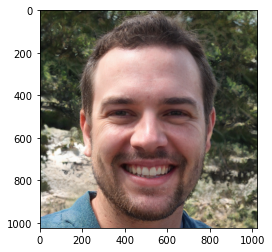

In [12]:

id_number = input("Please enter a number: ")

if id_number in all_persons.keys():
    person = all_persons[id_number]

    if person["Vaccine Type"] == "None":
        print("{} has not taken the vaccine yet.".format(person["Name"]))
    else:
        print("{} had {} vaccine and has a {} badge.".format(
        person["Name"],
        person["Vaccine Type"],
        badge_color(int(person["Days"]))
        ))
        img = cv2.imread("users/" + str(id_number) + ".jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        
else:
    print("id number: {} does not exist in the database".format(id_number))